In [28]:
import matplotlib.pyplot as plt
from scipy.stats import pareto
from tqdm import tqdm
import numpy as np

In [29]:
N = 10**5
T = 400
a = 0.01
# for a in np.arange(0,0.11,0.005)
s = 0.05
g = 0.02

In [30]:
w=np.zeros((T,N))
d=np.zeros((T,N))

In [31]:
## ** ## set initial values for wealth and income
# w[0,:] = np.random.normal(loc=0.0, scale=1.0, size=N)+5
# d[0,:] = np.random.normal(loc=0.0, scale=1.0, size=N)+5

w[0,:]=pareto(1.04).rvs(N)*100
d[0,:]=pareto(1.1).rvs(N)*100

In [32]:
def top_ten_share(arr):
    n_top_ten = round(0.1*(len(arr)))
    top_ten = np.sort(arr)[-n_top_ten:]
    share = np.sum(top_ten)/np.sum(arr)
    return share

In [33]:
for n in tqdm(range(T-1)):
    w[n+1] = w[n]*(1+a) + s*d[n]
    d[n+1] = d[n]*(1+g)

100%|██████████| 399/399 [00:00<00:00, 962.34it/s]


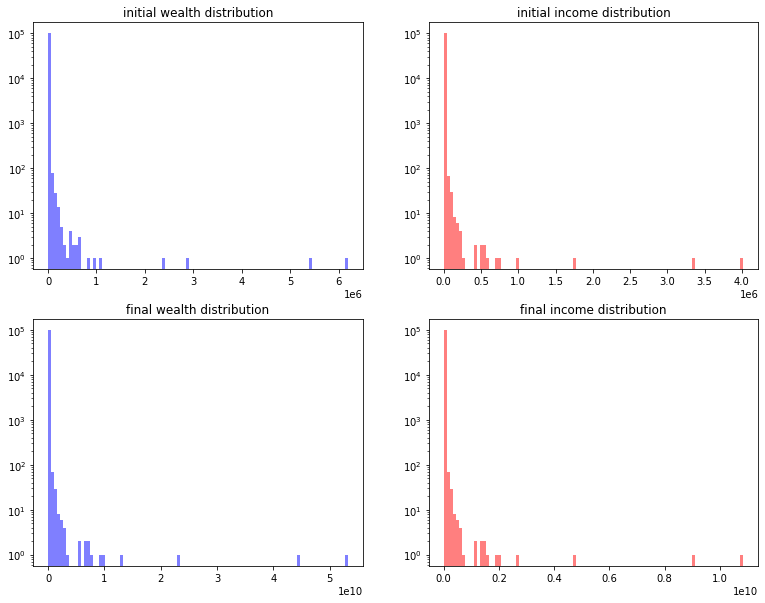

In [34]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
plt.hist(w[0,:], bins=100, alpha=0.5, color='b')
plt.yscale("log")
plt.title("initial wealth distribution")

plt.subplot(2,2,2)
plt.hist(d[0,:], bins=100, alpha=0.5, color='r')
plt.yscale("log")
plt.title("initial income distribution")

plt.subplot(2,2,3)
plt.hist(w[T-1,:], bins=100, alpha=0.5, color='b')
plt.yscale("log")
plt.title("final wealth distribution")

plt.subplot(2,2,4)
plt.hist(d[T-1,:], bins=100, alpha=0.5, color='r')
plt.yscale("log")
plt.title("final income distribution")

plt.show()

## The top 10% wealth share during time

In [37]:
top10share=[]
for n in range(T):
    top10share.append(top_ten_share(w[n,:]))

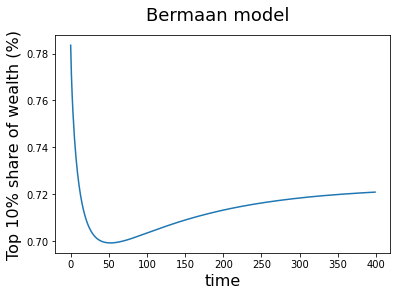

In [39]:
lableData={'title':'Bermaan model','yLabel':'Top 10% share of wealth (%)','xLabel':'time','name':'berman-top10%wealth-time.png'}
fig = plt.figure()
plt.xlabel(lableData['xLabel'], fontsize=16)
plt.ylabel(lableData['yLabel'], fontsize=16)
fig.suptitle(lableData['title'], fontsize=18)
plt.plot(np.arange(T),top10share);
fig.savefig(lableData['name'],dpi=250)

## different values of a

In [18]:
w[0,:]=pareto(1.04).rvs(N)*100
d[0,:]=pareto(1.1).rvs(N)*100
top10share=[]
for a in tqdm(np.arange(0,0.11,0.005)):    
    for n in range(T-1):
        w[n+1] = w[n]*(1+a) + s*d[n]
        d[n+1] = d[n]*(1+g)
        
    top10share.append(top_ten_share(w[-1,:]))

100%|██████████| 22/22 [00:04<00:00,  5.34it/s]


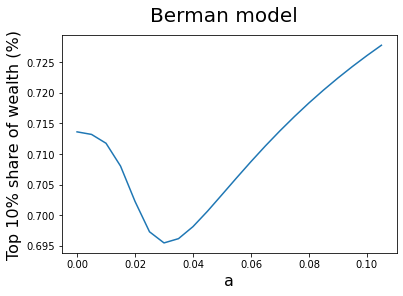

In [19]:
lableData={'title':'Berman model','yLabel':'Top 10% share of wealth (%)','xLabel':'a','name':'berman-top10%wealth-a-same_initial.png'}
fig = plt.figure()
plt.xlabel(lableData['xLabel'], fontsize=16)
plt.ylabel(lableData['yLabel'], fontsize=16)
fig.suptitle(lableData['title'], fontsize=20)
plt.plot(np.arange(0,0.11,0.005),top10share);
fig.savefig(lableData['name'],dpi=250)

## when initilization is done for each round (diffrenet a values)

In [12]:
top10share=[]
for a in tqdm(np.arange(0,0.11,0.005)):
    w[0,:]=pareto(2).rvs(N)*100
    d[0,:]=pareto(3).rvs(N)*100
    
    for n in range(T-1):
        w[n+1] = w[n]*(1+a) + s*d[n]
        d[n+1] = d[n]*(1+g)
        
    top10share.append(top_ten_share(w[-1,:]))

100%|██████████| 22/22 [00:04<00:00,  4.77it/s]


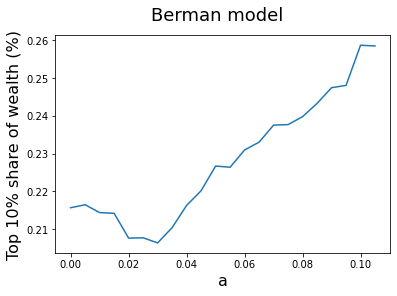

In [13]:
lableData={'title':'Berman model','yLabel':'Top 10% share of wealth (%)','xLabel':'a','name':'berman-top10%wealth-a.png'}
fig = plt.figure()
plt.xlabel(lableData['xLabel'], fontsize=16)
plt.ylabel(lableData['yLabel'], fontsize=16)
fig.suptitle(lableData['title'], fontsize=18)
plt.plot(np.arange(0,0.11,0.005),top10share);
fig.savefig(lableData['name'],dpi=250)